In [1]:
# IMPORTS
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import skimage.io as imo
import numpy as np
from skimage import transform
from skimage.color import rgb2gray
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)]
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith('.ppm')]
        
        for f in file_names:
            images.append(imo.imread(f))
            labels.append(int(d))
            
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images_train, labels_train = load_ml_data('Custom_Training/Training')
images_test, labels_test = load_ml_data('Custom_Testing/Testing')
print('Number of images:', len(images_train))
print('Number of labels:', len(labels_train))
print('Number of distinc traffic signals:', len(set(labels_train)))

C:\Users\Xexu\AppData\Local\Temp/ipykernel_2476/1920758936.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


Number of images: 3953
Number of labels: 3953
Number of distinc traffic signals: 25


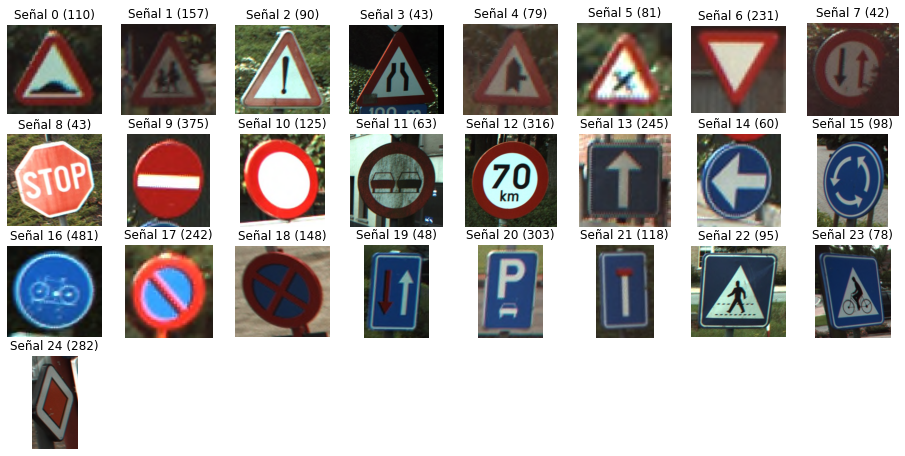

In [3]:
#Señales que seran classificadas
unique_labels = set(labels_train)
plt.figure(figsize=(16, 16))
i = 1
for label in unique_labels:
    temp_im = images_train[list(labels_train).index(label)]
    plt.subplot(8,8, i)
    plt.axis('off')
    plt.title('Señal {0} ({1})'.format(label, list(labels_train).count(label)))
    i += 1
    plt.imshow(temp_im)

In [4]:
#resize images
images_train = [transform.resize(image, (100,100)) for image in images_train]
images_test = [transform.resize(image, (100,100)) for image in images_test]

images_train = np.array(images_train)
images_test = np.array(images_test)

In [5]:
#gray scale
images_train = rgb2gray(images_train)
images_test = rgb2gray(images_test) 

In [6]:
images_train_optimized = []
for i, (imagen) in enumerate (images_train):
    imagen = imagen.reshape(100, 100, 1)
    images_train_optimized.append(imagen)
images_train = np.array(images_train_optimized)
images_train.shape

(3953, 100, 100, 1)

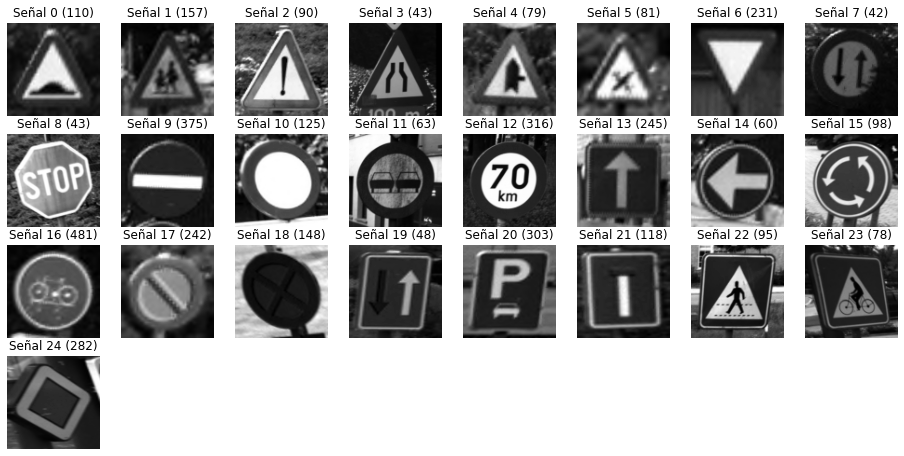

In [7]:
#Observamos resultados
unique_labels = set(labels_train)
plt.figure(figsize=(16, 16))
i = 1
for label in unique_labels:
    temp_im = images_train[list(labels_train).index(label)]
    plt.subplot(8,8, i)
    plt.axis('off')
    plt.title('Señal {0} ({1})'.format(label, list(labels_train).count(label)))
    i += 1
    plt.imshow(temp_im, cmap="gray")

In [8]:
modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(25, activation=tf.nn.softmax)  
    
])

In [9]:
modeloCNN.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [11]:
modeloCNN.fit(images_train, labels_train, epochs=50)

Epoch 1/50
124/124 [==============================] - 18s 137ms/step - loss: 1.0882 - accuracy: 0.7131
Epoch 2/50
124/124 [==============================] - 18s 141ms/step - loss: 0.1827 - accuracy: 0.9426
Epoch 3/50
124/124 [==============================] - 20s 162ms/step - loss: 0.0918 - accuracy: 0.9681
Epoch 4/50
124/124 [==============================] - 24s 191ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 5/50
124/124 [==============================] - 23s 189ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 6/50
124/124 [==============================] - 24s 190ms/step - loss: 0.0278 - accuracy: 0.9891
Epoch 7/50
124/124 [==============================] - 23s 183ms/step - loss: 0.0335 - accuracy: 0.9934
Epoch 8/50
124/124 [==============================] - 23s 183ms/step - loss: 0.0222 - accuracy: 0.9944
Epoch 9/50
124/124 [==============================] - 24s 190ms/step - loss: 0.0171 - accuracy: 0.9954
Epoch 10/50
124/124 [==============================] - 25s 201ms/step - l

In [12]:
modeloCNN.save('clasificador-senales-cnn-custom-bd.h5')

In [13]:
!tensorflowjs_converter --input_format keras clasificador-senales-cnn-custom-bd.h5 carpeta_salida

2022-06-23 17:45:10.588941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-23 17:45:10.588992: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
#Resultados CNN tras predecir todas las imagenes_test
predict = modeloCNN.predict(images_test)

counter = 0
for i in range(len(images_test)):
    image_to_predict = i
    label_predicted = np.argmax(predict[image_to_predict])
    true_label = str(labels_test[image_to_predict])
    predicted_label = str(label_predicted)
    
    if(true_label == predicted_label):
        counter = counter + 1
percent = counter * 100/len(images_test)

print("Accuracy CNN: ", percent, "%")

Accuracy CNN:  96.04444444444445 %


In [18]:
#Vamos a provar con un grupo de imagenes sin fondo
def load_images(data_directory):
    dirs = [d for d in os.listdir(data_directory)]
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith('.png')]
        
        for f in file_names:
            images.append(imo.imread(f))
            labels.append(int(d))
            
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

white_images, white_labels = load_images('Custom_blanco')
print('Number of images:', len(white_images))
print('Number of labels:', len(white_labels))

Number of images: 52
Number of labels: 52


C:\Users\Xexu\AppData\Local\Temp/ipykernel_15304/1807636647.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [19]:
#resize
white_images = [transform.resize(image, (100,100)) for image in white_images]

white_images = np.array(white_images)

In [20]:
#gray
white_images = rgb2gray(white_images)

C:\Users\Xexu\AppData\Local\Temp/ipykernel_15304/2517835469.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  white_images = rgb2gray(white_images)


In [25]:
#Resultados CNN con imagenes white and color
predict = modeloCNN.predict(white_images)

counter = 0
for i in range(len(white_images)):
    image_to_predict = i
    label_predicted = np.argmax(predict[image_to_predict])
    true_label = str(white_labels[image_to_predict])
    predicted_label = str(label_predicted)    
    print (true_label, ' = ', predicted_label)
    
    if(true_label == predicted_label):
        counter = counter + 1
percent = counter * 100/len(white_images)

print("Accuracy CNN white_images: ", percent, "%")

0  =  0
1  =  5
2  =  2
2  =  2
3  =  3
3  =  3
4  =  4
5  =  5
5  =  1
6  =  6
6  =  6
6  =  6
6  =  6
7  =  7
8  =  8
8  =  8
8  =  9
9  =  9
9  =  9
9  =  9
10  =  10
10  =  10
11  =  9
11  =  11
11  =  9
12  =  12
12  =  12
13  =  13
13  =  13
13  =  13
13  =  13
14  =  9
15  =  24
15  =  24
15  =  24
16  =  9
16  =  9
17  =  18
17  =  17
18  =  18
18  =  18
19  =  18
20  =  20
20  =  20
20  =  20
21  =  13
21  =  13
22  =  0
22  =  18
24  =  24
24  =  24
24  =  24
Accuracy CNN white_images:  67.3076923076923 %
